<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.**

**The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

**The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

**Variables**:

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

# **Data Description**

**Variables**:

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

**Demographic:**
* `Sex`: male or female("M" or "F")
* `Age`: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* `is_smoking`: whether or not the patient is a current smoker ("YES" or "NO")
* `Cigs Per Day`: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* `BP Meds`: whether or not the patient was on blood pressure medication (Nominal)
* `Prevalent Stroke`: whether or not the patient had previously had a stroke (Nominal)
* `Prevalent Hyp`: whether or not the patient was hypertensive (Nominal)
* `Diabetes`: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* `Tot Chol`: total cholesterol level (Continuous)
* `Sys BP`: systolic blood pressure (Continuous)
* `Dia BP`: diastolic blood pressure (Continuous)
* `BMI`: Body Mass Index (Continuous)
* `Heart Rate`: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* `Glucose`: glucose level (Continuous)
Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -**


##**Importing and Loading Data**

In [27]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Importing Cardiovascular Risk Prediction dataset into Pandas Dataframe
crp_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Cardiovascular Risk Prediction - Abhishek Shubham/data_cardiovascular_risk.csv')

##**Exploring Data Frame**

In [29]:
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [30]:
crp_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [31]:
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [32]:
# Checking the shape of data
print(f'CRP dataset has {crp_df.shape[0]} rows and {crp_df.shape[1]} columns.')

CRP dataset has 3390 rows and 17 columns.


In [33]:
#Descriptive Statistics
crp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [34]:
# Missing Values in each columns
crp_df.isnull().sum().sort_values(ascending= False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

**Findings:**

* Glucose has the maximum missing values which is 304 followed by 'education', 'BPmeds' and 'totChol'.
* Total 7 columns has missing values and 'heartRate' has the lowest missing value which is 1.

In [35]:
# Checking for duplicate values in the dataset
len(crp_df[crp_df.duplicated()])

0

Look's like there are no duplicate values.

#**Data Preprocessing**

We drop the education and id columns because it has no relation while predicting heart disease.

In [36]:
crp_df.drop(['id', 'education'], axis= 1, inplace= True)

In [37]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##**Handling Missing Values**

In [38]:
# percentage of missing data per category
total = crp_df.isnull().sum().sort_values(ascending=False)
percent_total = (crp_df.isnull().sum()/crp_df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


In [39]:
missing_data.index

Index(['glucose', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'], dtype='object')

In [40]:
# let's count the all rows which are having missing values 
count=0
for i in crp_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print(f'Total precentage of missing values in the entire dataset is {round((count/len(crp_df.index))*100)}')

Total number of rows with missing values is  386
Total precentage of missing values in the entire dataset is 11


At 8.97%, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


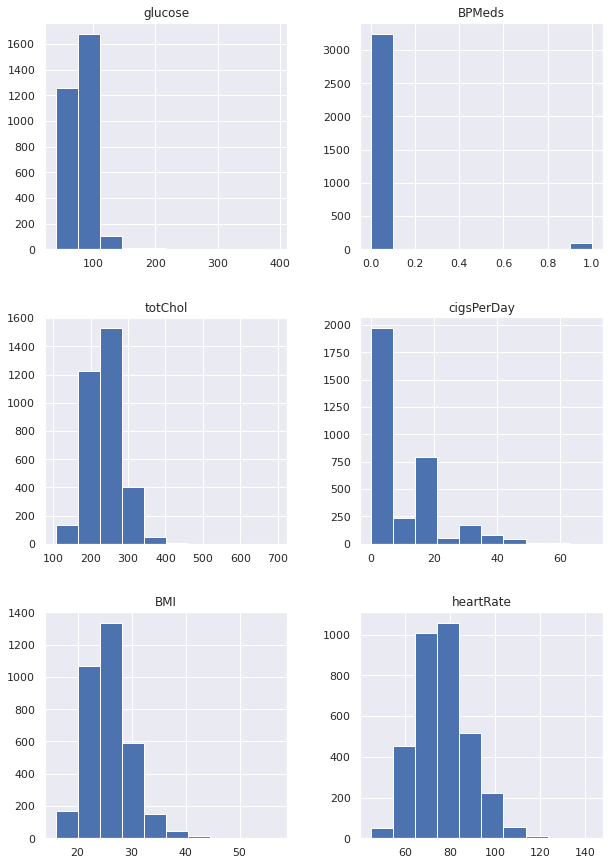

In [41]:
#Checking the distribution for missing data
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
crp_df[missing_data.index].hist(ax = ax)
plt.show()

From above distributions it's clearly visible that most of the data are right skewed. So for skewed data median and mode are suitable to impute the missing values.

In [42]:
#Creating a copy of orignal data
new_df= crp_df.copy()

In [43]:
#Replacing missing values with median or mode depending on column category

crp_df['heartRate']= crp_df['heartRate'].fillna(value=crp_df['heartRate'].median())

crp_df['BMI']= crp_df['BMI'].fillna(crp_df['BMI'].median())

mean_cigsPerDay= round(crp_df[crp_df['is_smoking'] == 'YES']['cigsPerDay'].mean(), 0)
crp_df['cigsPerDay']= crp_df['cigsPerDay'].fillna(mean_cigsPerDay)

median_totChol= crp_df['totChol'].median()
crp_df['totChol']= crp_df['totChol'].fillna(median_totChol)

mode_BPMeds= crp_df['BPMeds'].mode()[0]
crp_df['BPMeds'].fillna(mode_BPMeds, inplace= True)

median_glucose= crp_df['glucose'].median()
crp_df['glucose'].fillna(median_glucose, inplace= True)

In [44]:
#Checking for the presence of missing values after imputations
crp_df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

After the above imputations we can say that all the missings values are successfully removed from our dataset.

#**Exploratory Data Analysis**

##Univariate Analysis

<Figure size 576x360 with 0 Axes>

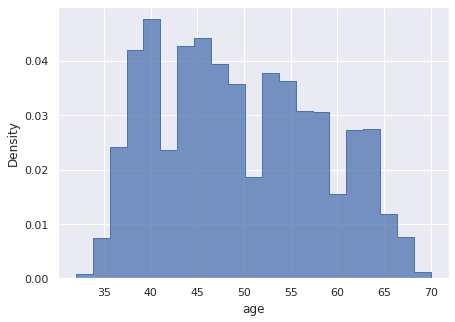

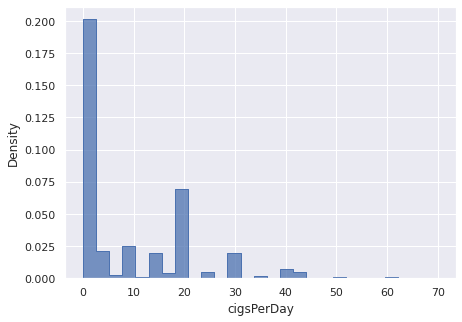

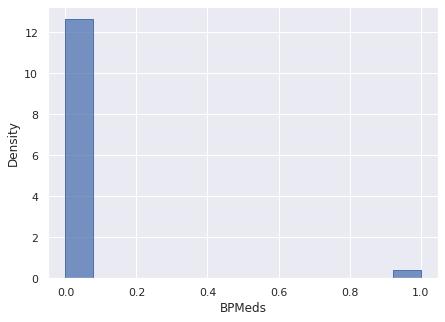

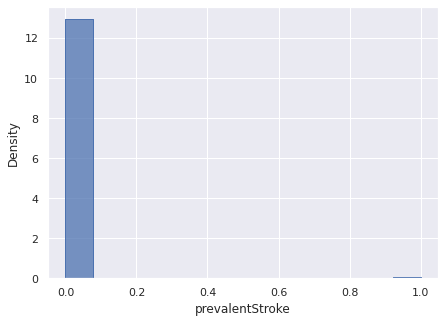

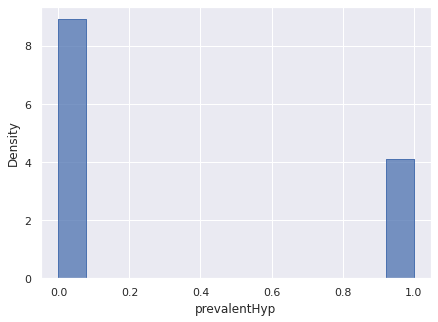

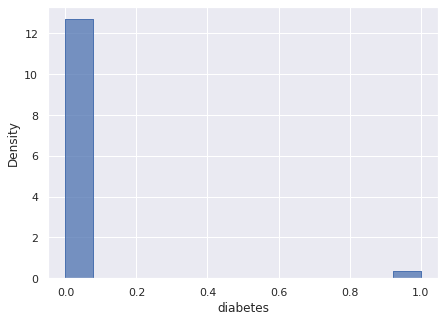

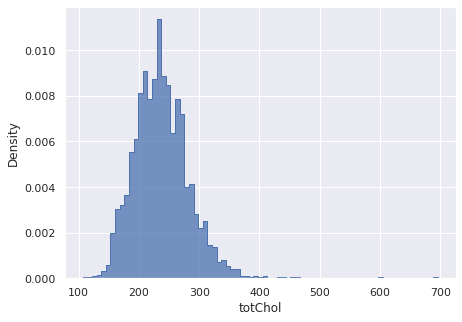

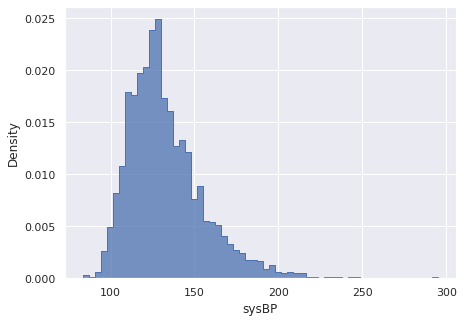

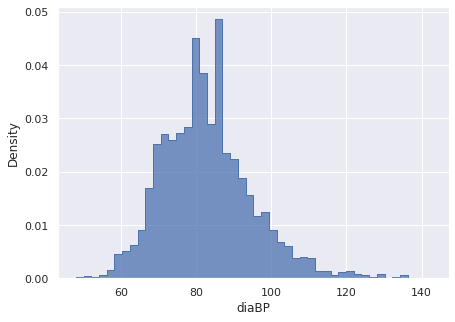

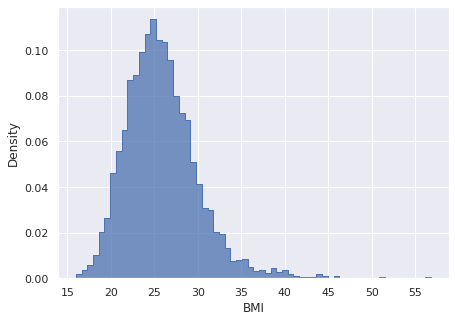

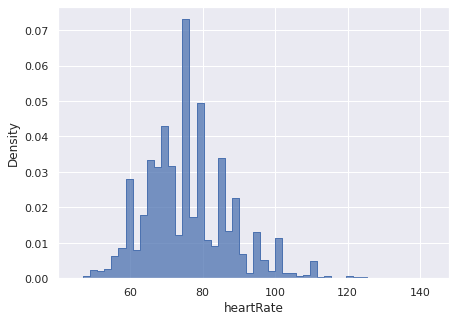

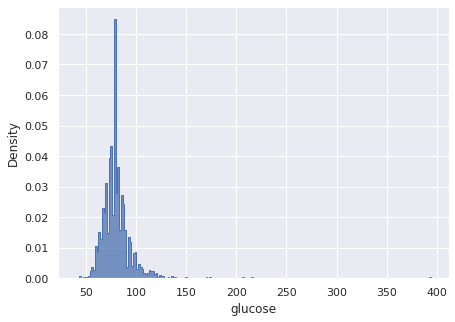

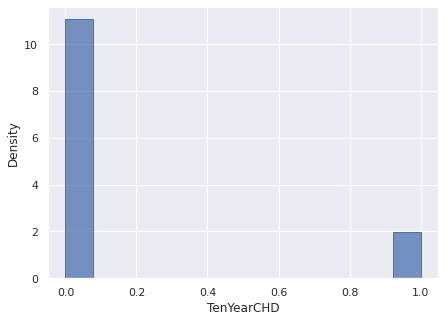

In [45]:
#Distribution of all the features

# Plotting Distributions of all the numerical variables
plt.figure(figsize= [8, 5])
features= list(crp_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(crp_df[col], ax= ax, stat= 'density', element= 'step'  )
  fig.set_figheight(5)
  fig.set_figwidth(7)

From above distribution plot we can say that the data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced. Also continious features like totChol , sysBP, BMI etc are right skewed.

In [46]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [47]:
# Visualizing the dependent variable 'TenYearCHD'
crp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Cardiovascular Risk rate')

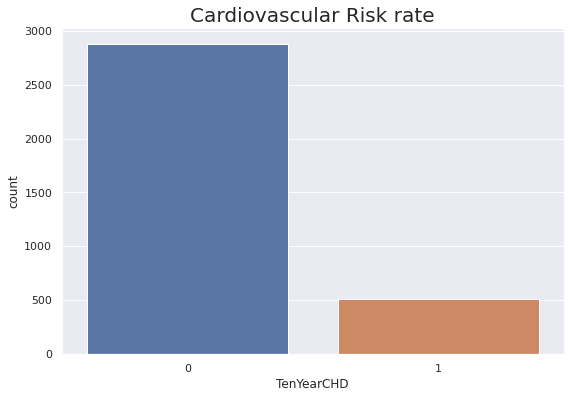

In [89]:
# Visualising dependent variable 'TenYearCHD' using countplot and Pie-chart
plt.figure(figsize= (9, 6))
sns.countplot(x= 'TenYearCHD', data= crp_df)
plt.title('Cardiovascular Risk rate',size = 20)

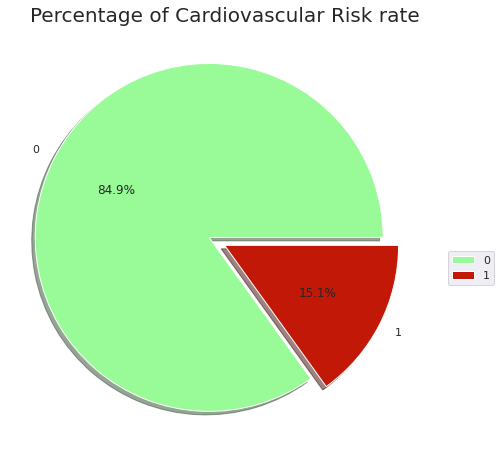

In [76]:
# Pie Chart for Type column
plt.figure(figsize=(10,8))
labels = crp_df['TenYearCHD'].value_counts(sort = True).index
sizes = crp_df['TenYearCHD'].value_counts(sort = True)
colors = ["#98FB98","#C21807"]
explode = (0.1,0)
plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentage of Cardiovascular Risk rate',size = 20)
plt.legend(labels= labels, bbox_to_anchor=(1,0.5))
plt.show()

**Findings:**

* It's clearly visible that there is a class imbalance problem with our datset!
* Number of people without the disease greatly exceeds the number of people with the disease.
* An imbalance occurs when one or more classes have very low proportions in the training data as compared to the other classes.

* Problems with Class Imbalance problem is that the abundance of examples from the majority class (or classes) can swamp the minority class. Most machine learning algorithms for classification predictive models are designed and demonstrated on problems that assume an equal distribution of classes.

In [79]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Text(0.5, 1.0, 'Count of Male VS Female')

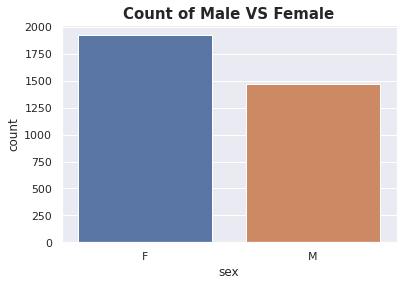

In [90]:
#Visualising the 'Sex' feature using sns countplot

sns.countplot(x= 'sex', data= crp_df )
plt.title('Count of Male VS Female', size= 15, weight='bold')

In our dataset the records of female are more than men.

Text(0.5, 1.0, 'No of people smoking vs not smoking')

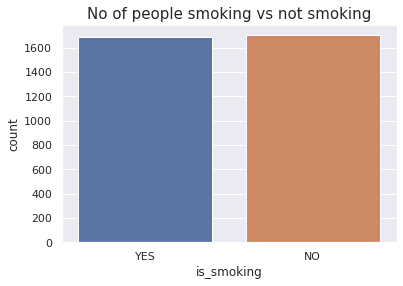

In [93]:
# Peple smoking vs not smoking

sns.countplot(x= 'is_smoking', data= crp_df )
plt.title('No of people smoking vs not smoking', size= 15)

Number of people who smokes vs people wo doesn't is almost similar in the dataset.

In [94]:
crp_df['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
18.0      29
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

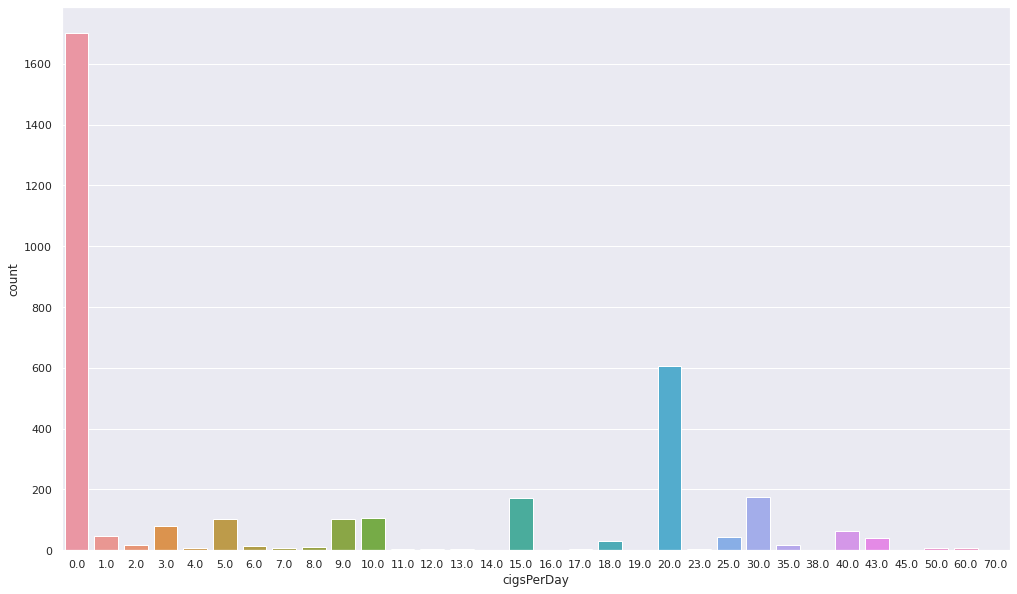

In [98]:
plt.figure(figsize= (17, 10))
sns.countplot(x= 'cigsPerDay', data= crp_df)

In [99]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Text(0.5, 1.0, 'Count of people who previously had Stroke')

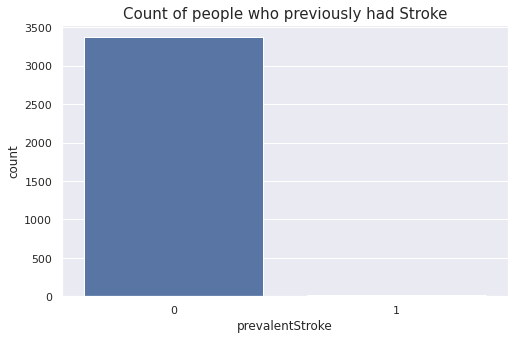

In [106]:
#Visualizing 'prevalentStroke' feature using Sns countplot method
plt.figure(figsize= (8, 5))
sns.countplot(x= 'prevalentStroke', data= crp_df )
plt.title('Count of people who previously had Stroke', size= 15)

In [101]:
crp_df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

Number of people having Stroke in past is very less which is 22 vs number of people who didn't have stroke.

Text(0.5, 1.0, 'Count of people who previously had Hypertension')

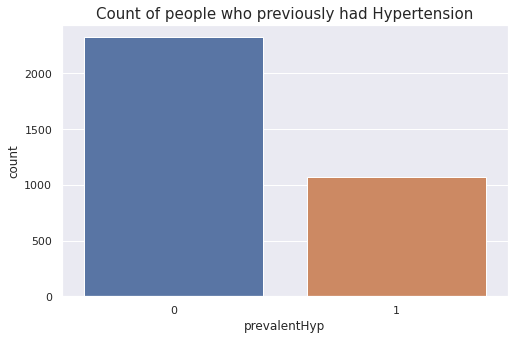

In [110]:
plt.figure(figsize= (8, 5))
sns.countplot(x= 'prevalentHyp', data= crp_df )
plt.title('Count of people who previously had Hypertension', size= 15)

In [109]:
crp_df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [111]:
len(crp_df.index)

3390

* Out of 3390 patients from the records 1069 people had Hypertension before.

* In Medical terms High blood pressure (hypertension) is a common condition in which the long-term force of the blood against your artery walls is high enough that it may eventually cause health problems, such as heart disease.

* From medical point of view it can be said that people with hypertension are more like to have heart disease in future.

Text(0.5, 1.0, 'Count of people who had diabetes')

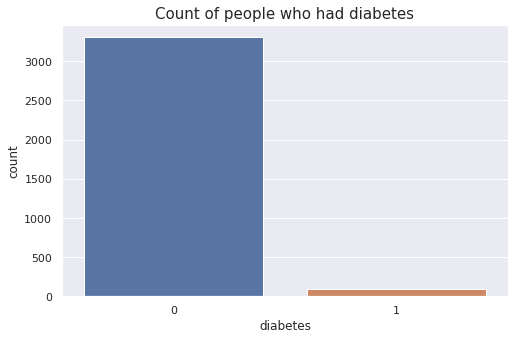

In [112]:
# Visualizing 'diabetes' column
plt.figure(figsize= (8, 5))
sns.countplot(x= 'diabetes', data= crp_df )
plt.title('Count of people who had diabetes', size= 15)

In [114]:
crp_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

* Out of 3390 patients from our records 87 people had diabetes.

* **Interesting fact about diabetes is that if a person have diabetes, then they are twice as likely to have heart disease or a stroke than someone who doesn't have diabetes—and at a younger age. The longer anyone have diabetes, the more likely they are to have heart disease.**

# Bivariate & Multivariate Analysis